## KOSPI와 다우존스 지수 비교


### pandas_datareader를 이용하여 yahoo 데이터 가져오기

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


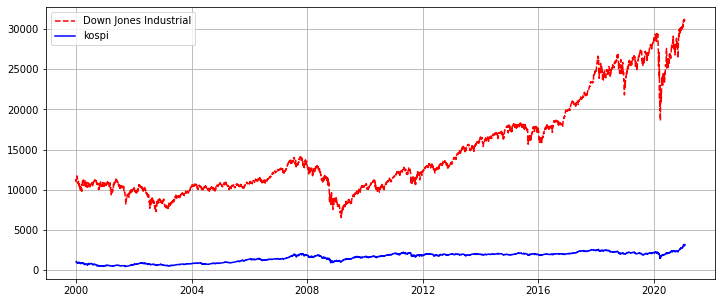

In [18]:
# 야후 주식심볼 기호 다우지수 : ^DJI 코스피: ^KS11
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

import matplotlib.pyplot as plt

dow = pdr.get_data_yahoo('^DJI','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')
kospi

#'r--'붉은점선  'b' 푸른실선
plt.figure(figsize=(12,5))
plt.plot(dow.index, dow.Close, 'r--', label="Down Jones Industrial")
plt.plot(kospi.index, kospi.Close, 'b', label="kospi")
plt.grid(True)
plt.legend(loc="best")

## 지수화 비교
###### 일별 종가만으로는 KOSPI와 다우존스 지수의 상관관계를 비교하기 어려웠다, 그러므로 현재 종가를 특정 시점의 종라고 나누어 변동률을 구해보도록합니다.

In [25]:
#지수화
d=(dow.Close / dow.Close.loc['2001-01-04'])*100
k=(kospi.Close / kospi.Close.loc['2001-01-04'])*100
k

Date
2000-01-04    189.785313
2000-01-05    176.751723
2000-01-06    172.178407
2000-01-07    170.002866
2000-01-10    176.918382
                 ...    
2021-01-20    558.143067
2021-01-21    566.438475
2021-01-22    562.816704
2021-01-25    575.067180
2021-01-26    562.759390
Name: Close, Length: 5186, dtype: float64

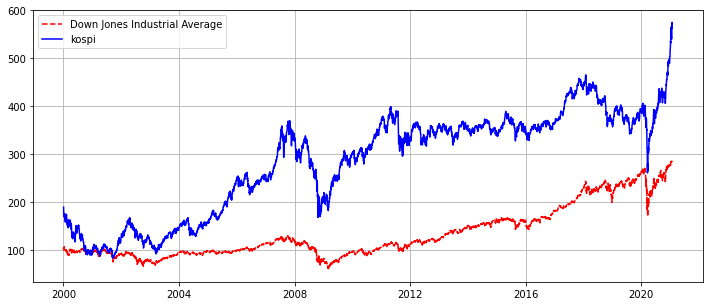

In [35]:
#그래프 그려보기
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(d.index , d, 'r--', label="Down Jones Industrial Average")
plt.plot(k.index , k, 'b', label="kospi")
plt.grid()
plt.legend(loc="best")
plt.show()

### 산점도 분석

In [41]:
import pandas as pd
from pandas_datareader import data as pdr 

dow = pdr.get_data_yahoo('^DJI','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')


#다우존스 지수의 종가 칼럼과 코스피 지수의 종가 칼럼으로 데이터 프레임을 생성
df = pd.DataFrame({'DOW':dow['Close'], 'KOSPI':kospi['Close']})

#NaN제거
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,DOW,KOSPI
Date,,
2000-01-03,11357.509766,1059.040039
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
...,...,...
2021-01-20,31188.380859,3114.550049
2021-01-21,31176.009766,3160.840088
2021-01-22,30996.980469,3140.629883


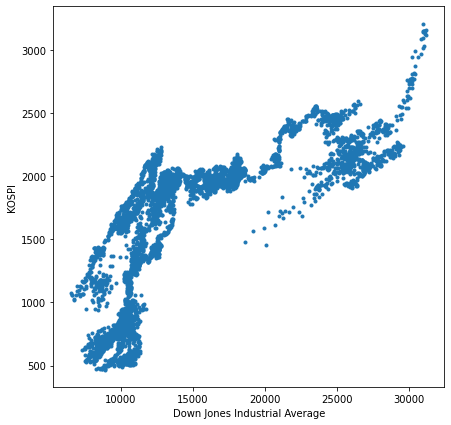

In [44]:
# 산점도 그리기

import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(df['DOW'], df['KOSPI'] ,marker='.')
plt.xlabel("Down Jones Industrial Average")
plt.ylabel("KOSPI")
plt.show()